# IMPORTED AND READ THE DATA 

In [1]:
import seaborn as sns
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode,iplot, plot
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
sns.set_style('whitegrid')

In [2]:
meningitis_data = pd.read_csv(r"C:\Users\user\Videos\meningitis_dataset.csv",index_col='firstname')

# FILTERED DATA FOR EASY USE 

In [3]:
meningitis_data.drop(['serotype','id','null_serotype','viral_haemmorrhaphic_fever',"surname",'measles',"middlename","date_of_birth","meningitis",'diarrhoea','cholera','age_str','ebola','marburg_virus','yellow_fever',"report_date",'rubella_mars','malaria','gender_male','gender_female','rural_settlement','urban_settlement','NmA','NmC','NmW','unconfirmed','confirmed','null_serotype','alive','dead'],axis=1,inplace=True)

# CHANGED A COLUMNS NAME AND MAPPED BINARY VALUES TO STRINGS


In [4]:
meningitis_data.rename(columns= {"child_group":"Age_group"}, inplace=True)

In [5]:
meningitis_data['Age_group'] = meningitis_data['Age_group'].map({1:'child', 0:'adult'})

In [6]:
meningitis_data.head()

,gender,state,settlement,report_year,age,Age_group,adult_group,disease,health_status,report_outcome
firstname,,,,,,,,,,
Grace,Female,Rivers,Rural,2018,32,adult,1,Cholera,alive,confirmed
Kure,Male,Ebonyi,Rural,2017,32,adult,1,Marburg Virus,Alive,Confirmed
Adaugo,Female,Ogun,Urban,2012,24,adult,1,Marburg Virus,Dead,Not Confirmed
Mooslemat,Female,Ondo,Rural,2010,63,adult,1,Measles,Alive,Not Confirmed
Yusuf,Male,Oyo,Urban,2017,9,child,0,Rubella Mars,Alive,Confirmed


In [7]:
agess = meningitis_data['age']
meningitis_data['age'].value_counts().head()

2    7492
3    6935
4    6628
5    6346
6    5735
Name: age, dtype: int64

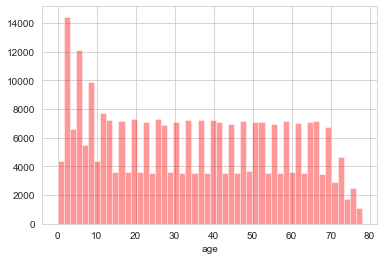

In [8]:
sns.distplot(agess,kde=False, color='red')

In [9]:
meningitis_data['state'].value_counts().head() #states with most cases

Niger      7842
Ondo       7835
Kano       7822
Bayelsa    7797
Imo        7783
Name: state, dtype: int64

In [10]:
meningitis_data['Age_group'].value_counts().head() # popular with adult

adult    201498
child     82986
Name: Age_group, dtype: int64

In [11]:
meningitis_data['age'].value_counts().head() # affects children a lot more

2    7492
3    6935
4    6628
5    6346
6    5735
Name: age, dtype: int64

In [12]:
meningitis_data['health_status']['Grace'] = "Alive"
gender_status = meningitis_data.groupby('gender')["health_status"].value_counts() 
gender_status
# More females in the dataset

gender  health_status
Female  Alive            75986
        Dead             71286
Male    Alive            68733
        Dead             68479
Name: health_status, dtype: int64

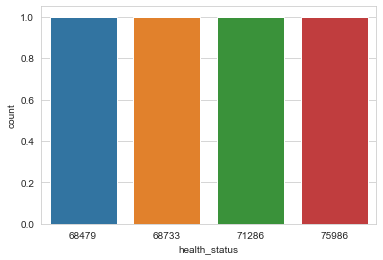

In [13]:
count__plot =sns.countplot(meningitis_data.groupby('gender')["health_status"].value_counts())

In [14]:
meningitis_data['gender'].value_counts()

Female    147272
Male      137212
Name: gender, dtype: int64

In [15]:
settlement_deaths_status = meningitis_data.groupby('settlement')["health_status"].value_counts() 
settlement_deaths_status

settlement  health_status
Rural       Alive            72307
            Dead             70256
Urban       Alive            72412
            Dead             69509
Name: health_status, dtype: int64

In [16]:
meningitis_data.groupby('settlement').count()['health_status']
# rural settlement has the most cases

settlement
Rural    142563
Urban    141921
Name: health_status, dtype: int64

In [17]:
meningitis_data['report_outcome']['Grace'] = "Confirmed"
meningitis_data['report_outcome'].value_counts()

Confirmed        144275
Not Confirmed    140209
Name: report_outcome, dtype: int64

In [18]:
meningitis_data['report_year'].value_counts().head(n=1)
# 2013 has the most cases 

2013    28745
Name: report_year, dtype: int64

In [19]:
meningitis_data[meningitis_data["health_status"] == "Dead"].groupby("report_year")["health_status"].value_counts()

report_year  health_status
2009         Dead             13946
2010         Dead             14052
2011         Dead             13835
2012         Dead             14060
2013         Dead             14111
2014         Dead             13862
2015         Dead             13821
2016         Dead             14095
2017         Dead             14115
2018         Dead             13868
Name: health_status, dtype: int64

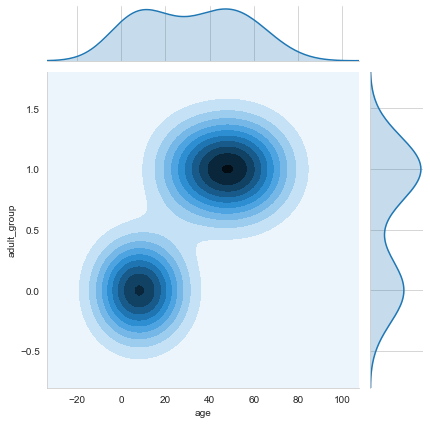

In [20]:
sns.jointplot(data=meningitis_data.head(n=30),kind='kde',x='age',y='adult_group')
# plot  of age by adult

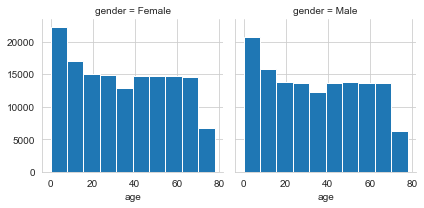

In [21]:
g = sns.FacetGrid(data=meningitis_data,col='gender')
g.map(plt.hist,"age")
#distribution of gender by age

Text(0.5, 1.0, 'meningitis_data.corr()')

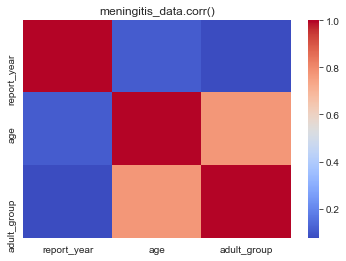

In [22]:
sns.heatmap(meningitis_data.corr(),cmap='coolwarm')
plt.title('meningitis_data.corr()')